# Comprehensive Overview Of Tesla Stock Prices (2023)

**Analyst:** Noah Oyugi

Tesla, a company led by visionary entrepreneur Elon Musk, has been a focal point in the Electrical Vehicles and Renewable Energy. Its stock prices have experienced remarkable volatility, making it a captivating subject for analysis. Through a combination of statistical tools, technical analysis, and fundamental metrics, this report navigates the intricacies of what shaped Tesla's stock market for the year 2023.

Whether you are considering an investment, re-evaluating your portfolio, or simply curious about the forces shaping Tesla's financial narrative, this analysis is designed to offer valuable insights. 

**Data Source:** [Yahoo Finance](https://finance.yahoo.com/quote/TSLA/history?period1=1672531200&period2=1706659200&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true)

In [55]:
import seaborn as sns
import pandas as pd
import mplfinance as mpf
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from matplotlib.font_manager import fontManager, FontProperties
import scipy.stats as stats

# set Tesla font for the vizes
# path = 'TESLA.ttf'
# fontManager.addfont(path)
# prop = FontProperties(fname=path)

# set visualization parameters
params = {
    "lines.linewidth": 2.5,
    "figure.figsize": (12, 6),
    "axes.labelsize": 14,
    "axes.titlesize": 18,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "axes.spines.right": False,
    "axes.spines.top": False,
}
sns.set_theme(
    context='notebook', style='white',
    palette='deep', font='Verdana',
    color_codes=True, rc=params)

## Data Loading and Inspection

In [56]:
tsla_stock_df = pd.read_csv('TSLA.csv', parse_dates=True, index_col='Date').loc['2023']
tsla_stock_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,118.470001,118.800003,104.639999,108.099998,108.099998,231402800
2023-01-04,109.110001,114.589996,107.519997,113.639999,113.639999,180389000
2023-01-05,110.510002,111.750000,107.160004,110.339996,110.339996,157986300
2023-01-06,103.000000,114.389999,101.809998,113.059998,113.059998,220911100
2023-01-09,118.959999,123.519997,117.110001,119.769997,119.769997,190284000


In [57]:
tsla_stock_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2023-01-03 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       250 non-null    float64
 1   High       250 non-null    float64
 2   Low        250 non-null    float64
 3   Close      250 non-null    float64
 4   Adj Close  250 non-null    float64
 5   Volume     250 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [58]:
tsla_stock_df.describe().style.format("{:.2f}")

,Open,High,Low,Close,Adj Close,Volume
count,250.00,250.00,250.00,250.00,250.00,250.00
mean,217.08,221.63,212.67,217.48,217.48,137322225.20
std,42.28,42.46,41.83,41.92,41.92,35773098.41
min,103.00,111.75,101.81,108.10,108.10,65125200.00
25%,186.38,189.94,182.91,186.12,186.12,111763225.00
50%,223.56,226.56,218.02,222.14,222.14,128582450.00
75%,251.79,257.99,247.39,253.02,253.02,157884000.00
max,296.04,299.29,289.52,293.34,293.34,306590600.00


## Stock Price Analysis

### Price Trend

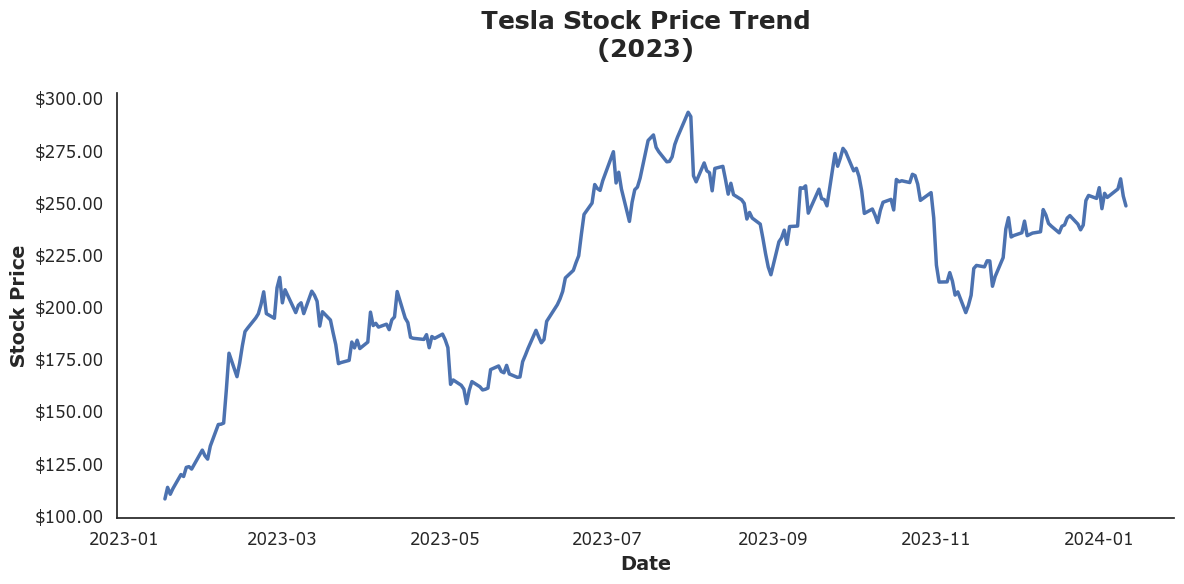

In [59]:
ax = tsla_stock_df['Adj Close'].plot(ylabel='Stock Price', rot=False)
ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.2f}'))
ax.set_title('Tesla Stock Price Trend\n(2023)\n',
             loc='center', fontweight='bold')
plt.tight_layout();

### Moving Averages Analysis 

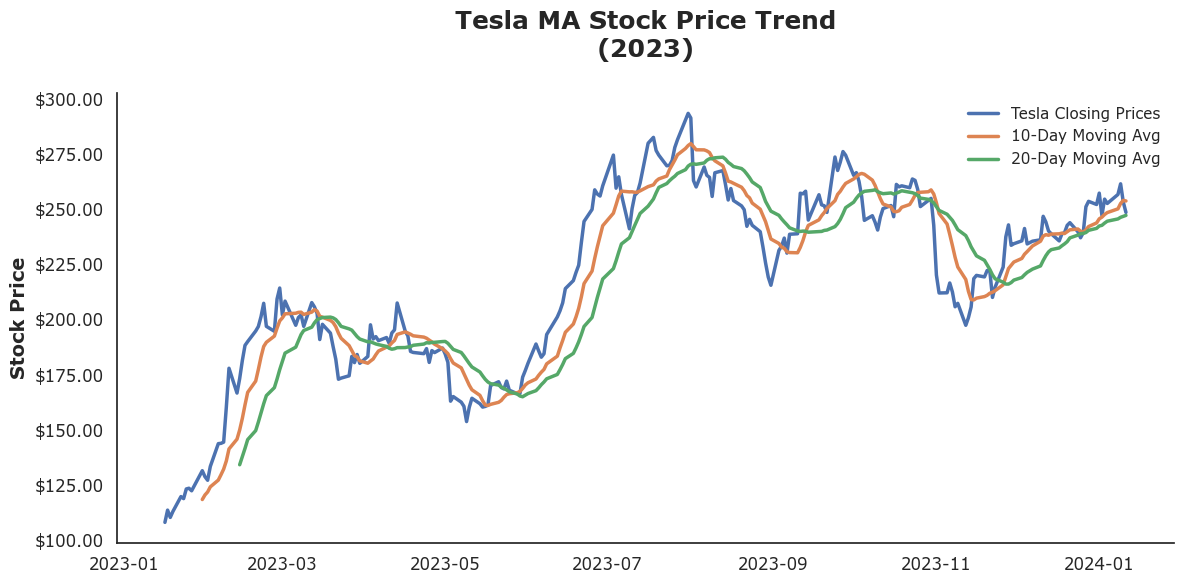

In [60]:
ax = (tsla_stock_df['Adj Close']
      .plot(label='Tesla Closing Prices', rot=False))
# 10 days MA
(tsla_stock_df['Adj Close']
 .rolling(window=10)
 .mean()
 .plot(ax=ax, label='10-Day Moving Avg', rot=False))

# 20 days MA
(tsla_stock_df['Adj Close']
 .rolling(window=20)
 .mean()
 .plot(ax=ax, label='20-Day Moving Avg', rot=False))

ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.2f}'))
ax.set_title('Tesla MA Stock Price Trend\n(2023)\n',
             loc='center', fontweight='bold')
ax.set_xlabel('')
ax.set_ylabel('Stock Price')
ax.legend()
plt.tight_layout()

### Volatility Analysis

**Volatility** is a measure of how much the stock price fluctuates over time.

For the year 2023 the month of January experienced larger price fluctuations compared to other months. This may indicate:
 - In that month Tesla's stock was riskier compared to other months.
 - In that month stock prices were more sensitive to market conditions hence larger price swings.
 - In that month investors with a higher risk tolerance found Tesla stocks as profitable for the short term.

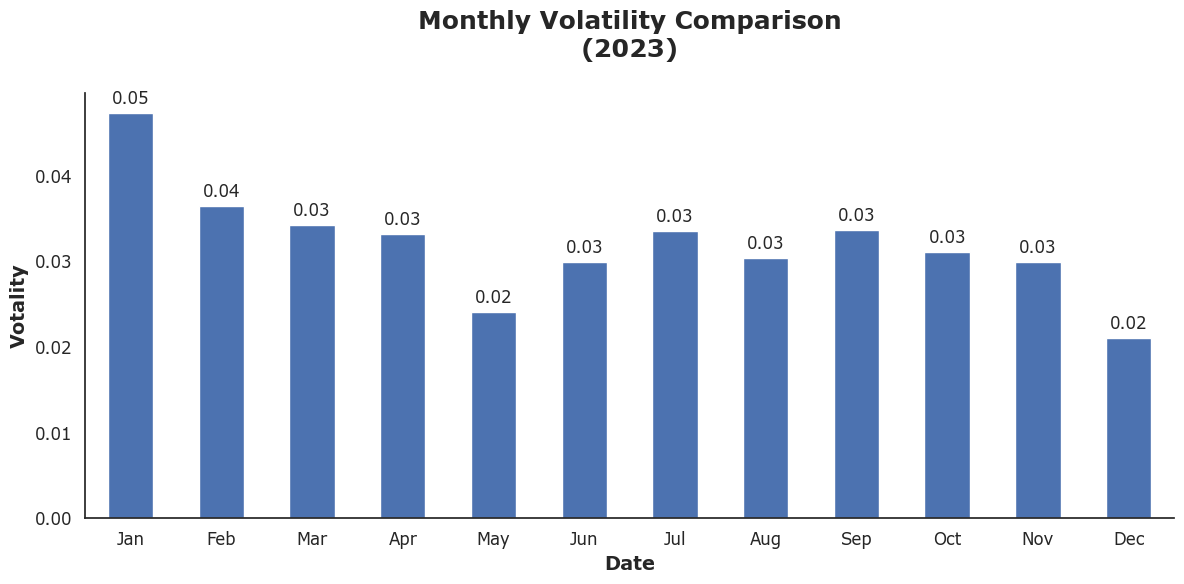

In [61]:
volatility = (tsla_stock_df['Adj Close']
              .pct_change()
              .resample('ME')
              .std())
volatility.index = volatility.index.strftime('%b')
ax = volatility.plot(kind='bar', ylabel='Votality', rot=False)
ax.set_title('Monthly Volatility Comparison\n(2023)\n',
             loc='center', fontweight='bold')
# Annotate bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.tight_layout()

## Volume Trend

Volume Trend shows how the volume of stock traded over the months. There is a clear trend about the quarters, with the first quarter leading in the volume traded.

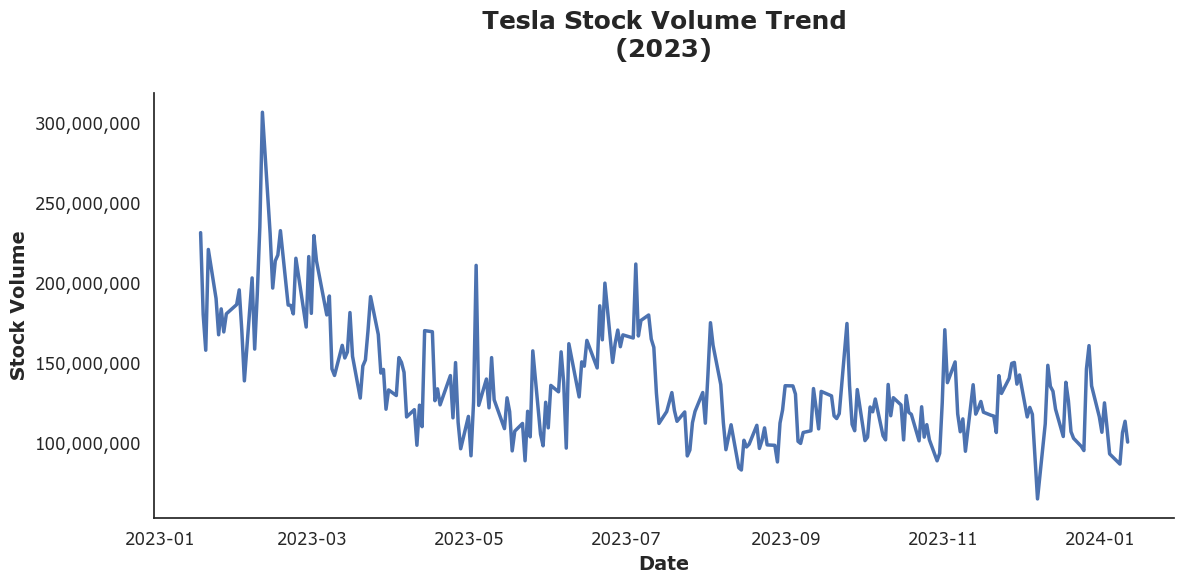

In [62]:
ax = tsla_stock_df['Volume'].plot(ylabel='Stock Volume', rot=False)
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
ax.set_title('Tesla Stock Volume Trend\n(2023)\n',
             loc='center', fontweight='bold')
plt.tight_layout();

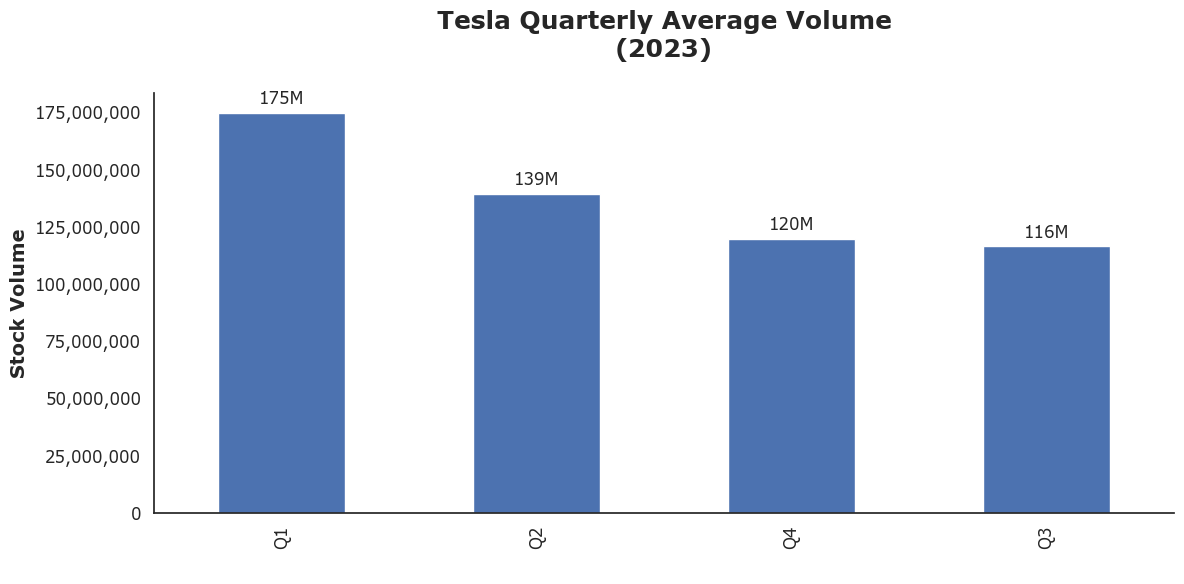

In [63]:
# Resample and calculate the mean
quarterly_rev_summary = (tsla_stock_df['Volume']
                         .resample('QE').mean()
                         .astype(int)
                         .to_frame()
                         .sort_values('Volume', ascending=False))

# Define the mapping dictionary
quarters = {
    '2023-03-31': 'Q1',
    '2023-06-30': 'Q2',
    '2023-09-30': 'Q3',
    '2023-12-31': 'Q4'
}

# Convert the index to string format and then map to quarters
quarterly_rev_summary.index = (quarterly_rev_summary
                               .index
                               .strftime('%Y-%m-%d')
                               .map(quarters))

# Display the DataFrame
ax = quarterly_rev_summary.plot(kind='bar', ylabel='Stock Volume', xlabel=' ', legend=False)
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
ax.set_title('Tesla Quarterly Average Volume\n(2023)\n',
             loc='center', fontweight='bold')

# Annotate bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()/1e6:.0f}M', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.tight_layout()